## Install and import packages

In [4]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [3]:
!pip install dask[dataframe]
!pip install pyarrow
!pip install modin[ray]
!pip install modin[dask]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [4]:
!pip install pandas==2.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
modin 0.30.1 requires pandas<2.3,>=2.2, but you have pandas 2.0.3 which is incompatible.


In [1]:
!pip install --upgrade google-colab modin cudf-cu12

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of modin to determine which version is compatible with other requirements. This could take a while.
  Using cached modin-0.30.1-py3-none-any.whl (1.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of modin to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.1 MB/s eta 0:00:00
INFO: This is taking longer than usual. You might need t

In [2]:
import pandas as pd
import dask
import dask.dataframe as dd
import modin.pandas as mpd
import ray

In [5]:
drive.mount('/content/drive')

os.chdir("./drive/MyDrive/Data Glacier")

Mounted at /content/drive


In [6]:
filepath = './Week 6: Data Ingestion Pipeline/'

In [ ]:
results_loading = []

### Read file with Dask

In [ ]:
start = time.time()
dask_df = dd.read_csv(filepath + 'HI-Medium_Trans.csv')
end = time.time()
print("Read csv with dask: ",(end-start),"sec")
results_loading.append({"lib":"sec_Dask","time":float("{}".format(end-start))})

Read csv with dask:  1.309049129486084 sec


### Read file with Ray

In [ ]:
os.environ["MODIN_ENGINE"] = "ray"
import modin.pandas as ray_pd

# ray.shutdown()
# ray.init()
start = time.time()
df = ray_pd.read_csv(filepath + 'HI-Medium_Trans.csv')
end = time.time()
print("Read csv with modin and ray: ",(end-start),"sec")
results_loading.append({"lib":"sec_Ray","time":float("{}".format(end-start))})

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

2024-06-10 15:41:02,882	INFO worker.py:1753 -- Started a local Ray instance.


Read csv with modin and ray:  71.55321407318115 sec


### Read file with Pandas

In [ ]:
start = time.time()
df = pd.read_csv(filepath + 'HI-Medium_Trans.csv')
end = time.time()
print("Read csv with pandas: ",(end-start),"sec")
results_loading.append({"lib":"sec_Pandas","time":float("{}".format(end-start))})

Read csv with pandas:  53.3844838142395 sec


### Read file with Modin[Dask]

In [ ]:
os.environ["MODIN_ENGINE"] = "dask"
import modin.pandas as dask_pd

start = time.time()
df = dask_pd.read_csv(filepath + 'HI-Medium_Trans.csv')
end = time.time()
print("Read csv with modin and ray: ",(end-start),"sec")
results_loading.append({"lib":"sec_Modin[Dask]","time":float("{}".format(end-start))})

Read csv with modin and ray:  20.46666717529297 sec


In [ ]:
results_loading

[{'lib': 'sec_Dask', 'time': 1.309049129486084},
 {'lib': 'sec_Ray', 'time': 71.55321407318115},
 {'lib': 'sec_Pandas', 'time': 53.3844838142395},
 {'lib': 'sec_Modin[Dask]', 'time': 20.46666717529297}]

In [ ]:
loading = pd.DataFrame(results_loading)

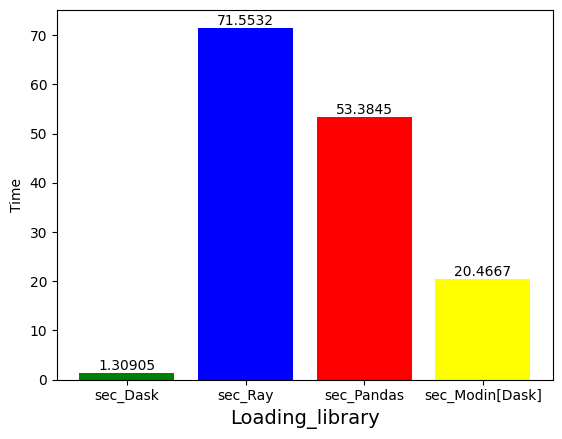

In [ ]:
colors = ['green','blue','red','yellow']
ax=plt.bar(loading['lib'], loading['time'], color=colors)
plt.bar_label(ax)
plt.xlabel('Loading_library', fontsize=14)
plt.ylabel('Time', fontsize=10)
plt.show()

The Dask loading package is the most computational efficient methods to loading the datase that are larger than 2 GB.

## Basic Validation on Data Columns

In [7]:
df = dd.read_csv(filepath + 'HI-Medium_Trans.csv')

In [ ]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 31898238 entries, 0 to 31898237
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 2.6+ GB


The dataset has 31898238 rows and 11 columns.

In [8]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:17,20,800104D70,20,800104D70,6794.63,US Dollar,6794.63,US Dollar,Reinvestment,0
1,2022/09/01 00:02,3196,800107150,3196,800107150,7739.29,US Dollar,7739.29,US Dollar,Reinvestment,0
2,2022/09/01 00:17,1208,80010E430,1208,80010E430,1880.23,US Dollar,1880.23,US Dollar,Reinvestment,0
3,2022/09/01 00:03,1208,80010E650,20,80010E6F0,73966883.00,US Dollar,73966883.00,US Dollar,Cheque,0
4,2022/09/01 00:02,1208,80010E650,20,80010EA30,45868454.00,US Dollar,45868454.00,US Dollar,Cheque,0


In [9]:
# Remove special character
df.columns = df.columns.str.replace('[#, @, &]', '')

In [10]:
# Remove white space from columns
df.columns = df.columns.str.replace(' ', '')

## Create a YAML file and validate the file

### Create utility function to read YMAL file and do data column validation

In [11]:
%%writefile utility.py
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime
import gc
import re

def read_config_file(filepath):
    ''' Parse the YAML file'''
    with open(filepath, 'r') as stream:
        try:
            return yaml.load(stream, Loader=yaml.Loader)
        except yaml.YAMLError as exc:
            logging.error(exc)

def replacer(string, char):
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string)
    return string

def col_header_val(df,table_config):
    ''' Replace whitespaces in the column and standardized column names'''
    df.columns = df.columns.str.lower()
    # replacing non-word characters with underscores
    df.columns = df.columns.str.replace('[^\w]','_',regex=True)
    # removing leading and trailing underscores
    df.columns = list(map(lambda x: x.strip('_'), list(df.columns)))
    df.columns = list(map(lambda x: replacer(x,'_'), list(df.columns)))
    expected_col = list(map(lambda x: x.lower(),  table_config['columns']))
    expected_col.sort()
    df.columns =list(map(lambda x: x.lower(), list(df.columns)))
    df = df.reindex(sorted(df.columns), axis=1)

    # compares the standardized column names with the expected column names
    # specified in the table configuration.
    if len(df.columns) == len(expected_col) and list(expected_col)  == list(df.columns):
        print("column name and column length validation passed")
        return 1
    else:
        print("column name and column length validation failed")
        mismatched_columns_file = list(set(df.columns).difference(expected_col))
        print("Following File columns are not in the YAML file",mismatched_columns_file)
        missing_YAML_file = list(set(expected_col).difference(df.columns))
        print("Following YAML columns are not in the file uploaded",missing_YAML_file)
        logging.info(f'df columns: {df.columns}')
        logging.info(f'expected columns: {expected_col}')
        return 0

Overwriting utility.py


### Wrtie YAML file

In [12]:
df.columns

Index(['Timestamp', 'FromBank', 'Account', 'ToBank', 'Account.1',
       'AmountReceived', 'ReceivingCurrency', 'AmountPaid', 'PaymentCurrency',
       'PaymentFormat', 'IsLaundering'],
      dtype='object')

In [13]:
%%writefile data.yaml
file_type: csv
dataset_name: file
file_name: HI-Medium_Trans
table_name: edsurv
inbound_delimiter: ","
outbound_delimiter: "|"
skip_leading_rows: 1
columns:
   - Timestamp
   - FromBank
   - Account
   - ToBank
   - Account.1
   - AmountReceived
   - ReceivingCurrency
   - AmountPaid
   - PaymentCurrency
   - PaymentFormat
   - IsLaundering

Overwriting data.yaml


In [ ]:
!pip install python-utils

In [14]:
# Reading config file
import utility as util
config_data = util.read_config_file("data.yaml")

In [15]:
config_data

{'file_type': 'csv',
 'dataset_name': 'file',
 'file_name': 'HI-Medium_Trans',
 'table_name': 'edsurv',
 'inbound_delimiter': ',',
 'outbound_delimiter': '|',
 'skip_leading_rows': 1,
 'columns': ['Timestamp',
  'FromBank',
  'Account',
  'ToBank',
  'Account.1',
  'AmountReceived',
  'ReceivingCurrency',
  'AmountPaid',
  'PaymentCurrency',
  'PaymentFormat',
  'IsLaundering']}

In [16]:
# normal process of reading the file
df_norm = dd.read_csv(filepath + 'HI-Medium_Trans.csv', delimiter = ',')
df_norm.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:17,20,800104D70,20,800104D70,6794.63,US Dollar,6794.63,US Dollar,Reinvestment,0
1,2022/09/01 00:02,3196,800107150,3196,800107150,7739.29,US Dollar,7739.29,US Dollar,Reinvestment,0
2,2022/09/01 00:17,1208,80010E430,1208,80010E430,1880.23,US Dollar,1880.23,US Dollar,Reinvestment,0
3,2022/09/01 00:03,1208,80010E650,20,80010E6F0,73966883.00,US Dollar,73966883.00,US Dollar,Cheque,0
4,2022/09/01 00:02,1208,80010E650,20,80010EA30,45868454.00,US Dollar,45868454.00,US Dollar,Cheque,0


In [25]:
# use cofig file to read the file
file_type = config_data['file_type']
source_file = "/content/drive/MyDrive/Data Glacier/Week 6: Data Ingestion Pipeline/" + config_data['file_name'] + f'.{file_type}'
df_config = pd.read_csv(source_file, sep = config_data['inbound_delimiter'])
df_config.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:17,20,800104D70,20,800104D70,6794.63,US Dollar,6794.63,US Dollar,Reinvestment,0
1,2022/09/01 00:02,3196,800107150,3196,800107150,7739.29,US Dollar,7739.29,US Dollar,Reinvestment,0
2,2022/09/01 00:17,1208,80010E430,1208,80010E430,1880.23,US Dollar,1880.23,US Dollar,Reinvestment,0
3,2022/09/01 00:03,1208,80010E650,20,80010E6F0,73966883.00,US Dollar,73966883.00,US Dollar,Cheque,0
4,2022/09/01 00:02,1208,80010E650,20,80010EA30,45868454.00,US Dollar,45868454.00,US Dollar,Cheque,0


In [26]:
# validate the header of the file
util.col_header_val(df_config, config_data)

column name and column length validation failed
Following File columns are not in the YAML file ['payment_format', 'receiving_currency', 'from_bank', 'to_bank', 'amount_received', 'account_1', 'amount_paid', 'is_laundering', 'payment_currency']
Following YAML columns are not in the file uploaded ['islaundering', 'amountreceived', 'frombank', 'amountpaid', 'account.1', 'paymentcurrency', 'tobank', 'receivingcurrency', 'paymentformat']


0

In [27]:
print("columns of files are:" ,df.columns)
print("columns of YAML are:" ,config_data['columns'])

columns of files are: Index(['Timestamp', 'FromBank', 'Account', 'ToBank', 'Account.1',
       'AmountReceived', 'ReceivingCurrency', 'AmountPaid', 'PaymentCurrency',
       'PaymentFormat', 'IsLaundering'],
      dtype='object')
columns of YAML are: ['Timestamp', 'FromBank', 'Account', 'ToBank', 'Account.1', 'AmountReceived', 'ReceivingCurrency', 'AmountPaid', 'PaymentCurrency', 'PaymentFormat', 'IsLaundering']


In [29]:
if util.col_header_val(df_config,config_data)==0:
    print("validation failed")
else:
    print("col validation passed")

column name and column length validation failed
Following File columns are not in the YAML file ['payment_format', 'receiving_currency', 'from_bank', 'to_bank', 'amount_received', 'account_1', 'amount_paid', 'is_laundering', 'payment_currency']
Following YAML columns are not in the file uploaded ['islaundering', 'amountreceived', 'frombank', 'amountpaid', 'account.1', 'paymentcurrency', 'tobank', 'receivingcurrency', 'paymentformat']
validation failed


In [52]:
import csv
import gzip

from dask import dataframe as dd
df = dd.read_csv('/content/drive/MyDrive/Data Glacier/Week 6: Data Ingestion Pipeline/HI-Medium_Trans.csv', delimiter=",")

# Write csv in gz format in pipe separated text file (|)
df.to_csv('HI-Medium_Trans.csv.gz',
          sep='|',
          header=True,
          index=False,
          quoting=csv.QUOTE_ALL,
          compression='gzip',
          quotechar='"',
          doublequote=True)

['/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/00.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/01.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/02.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/03.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/04.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/05.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/06.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/07.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/08.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/09.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/10.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/11.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/12.part',
 '/content/drive/MyDrive/Data Glacier/HI-Medium_Trans.csv.gz/13.part',
 '/con

In [53]:
# Get file summary
file_size = os.path.getsize('HI-Medium_Trans.csv.gz')
num_rows = len(df)
num_cols = len(df.columns)

In [54]:
# Print file summary
print("File summary:")
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(f"File size: {file_size} bytes")

File summary:
Number of rows: 31898238
Number of columns: 11
File size: 4096 bytes
